# Análisis Exploratorio de Datos
Se procede a realizar el análisis exploratorio de datos, vamos a utilizar el data set Movies

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Realizar la lectura del archivo de películas (2000 seleccionadas aleatorias para el modelo de recomendación y funcionamiento de Render)
movies = pd.read_csv(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Laboratorios Individual\Laboratorio 1\movies_limpios.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22776 entries, 0 to 22775
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22776 non-null  int64  
 1   budget             22776 non-null  float64
 2   id                 22776 non-null  int64  
 3   original_language  22774 non-null  object 
 4   overview           22469 non-null  object 
 5   popularity         22776 non-null  float64
 6   release_date       22776 non-null  object 
 7   revenue            22776 non-null  float64
 8   runtime            22727 non-null  float64
 9   spoken_languages   22776 non-null  object 
 10  status             22776 non-null  object 
 11  tagline            12309 non-null  object 
 12  title              22776 non-null  object 
 13  vote_average       22776 non-null  float64
 14  vote_count         22776 non-null  float64
 15  id_collections     2526 non-null   float64
 16  name_collections   252

In [26]:
#Se verifican los status de las películas
movies["status"].unique()

array(['Released'], dtype=object)

# Análisis Descriptivo
Se procede a realizar el análisis descriptivo de la información en Movies

In [27]:
#Vamos a describir la variable vote_average
movies["vote_average"].describe(include="all")

count   22776.00
mean        5.68
std         1.60
min         0.00
25%         5.00
50%         5.90
75%         6.70
max        10.00
Name: vote_average, dtype: float64

In [28]:
# Vamos a describir el promedio de vote_average por tipo de genero (Tomaremos el genero 1 como principal)
a = movies.groupby(["genre_1_name"])["vote_average"].mean().reset_index()
a = pd.DataFrame(a)
a = a.rename(columns={"genre_1_name":"genero"}) #Ajustamos el nombre de la columna a genero
a = a.sort_values(by="vote_average", ascending= False)
a

,genero,vote_average
2,Animation,6.32
12,Music,6.26
5,Documentary,6.11
18,War,5.98
10,History,5.95
6,Drama,5.93
4,Crime,5.92
1,Adventure,5.85
14,Romance,5.78
3,Comedy,5.68


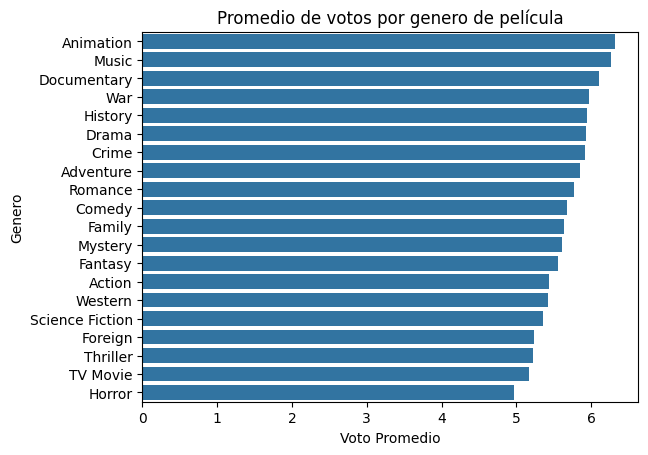

In [29]:
#Se procede a graficar el histograma del promedio de votaciones por genero
sns.barplot(x="vote_average", y="genero", data=a)  # Grafico de barras votos promedio por genero
plt.title("Promedio de votos por genero de película")
plt.xlabel("Voto Promedio")
plt.ylabel("Genero")
plt.show()

De acuerdo con lo desplegado en el gráfico los generos de películas con mayores votos promedio son: Animation, Music, Documentary y War

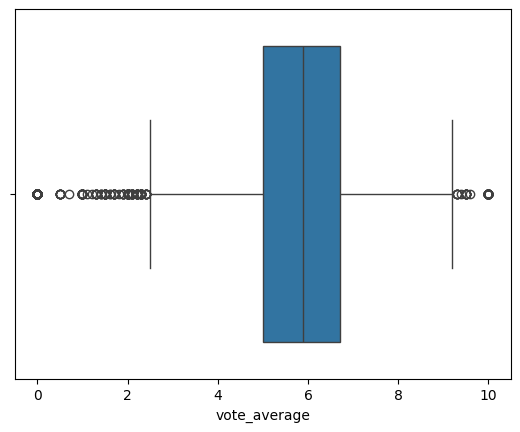

In [30]:
#Vamos a hacer un grafico de Cajas para la variable vote_average
sns.boxplot(x=movies["vote_average"])
plt.show()

Se evidencia en el grafico, siguiendo con la regla de Boxplot, que hay valores de votaciones atipicas por fuera del límite superior, es decir, más altas que el resto, y votaciones por debajo del limite inferior, más bajas que el resto. Sin embargo, se logra validar la coherencia de esta variable porque se encuentran en el rango de puntaje de 0 a 10, indicando que no hay registros de votaciones erroneas.

In [31]:
#Vamos a describir la variable revenue
pd.set_option('display.float_format', '{:.2f}'.format) #Para eliminar la notación cientifica y ver mejor los valores
movies["revenue"].describe(include="all")

count        22776.00
mean      19593504.78
std       86760714.61
min              0.00
25%              0.00
50%              0.00
75%             13.25
max     2787965087.00
Name: revenue, dtype: float64

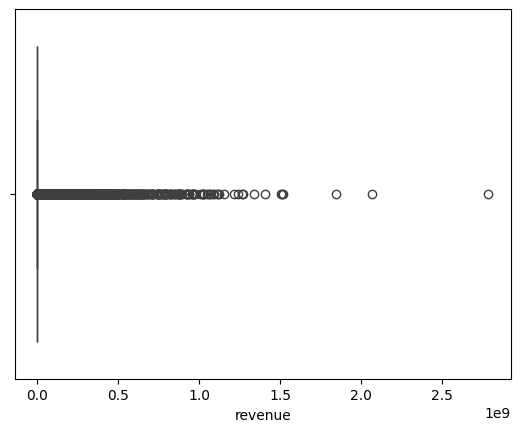

In [32]:
#Por evidenciarse una desviación estandar muy alta, 
#vamos a realizar el grafico de Cajas para validar datos atipicos en esta variable
sns.boxplot(x=movies["revenue"])
plt.show()

In [33]:
#Vamos a marcar en el data set los valores atipicos de revenue
q1= np.quantile(movies["revenue"], 0.25)
q3 = np.quantile(movies["revenue"], 0.75)
irq = q3 -q1
limite_sup = q3 +(1.5*irq) 
print(f"el limite superior es: {limite_sup}")

el limite superior es: 33.125


In [34]:
#Vamos a crear un nuevo data set filtrando solo los revenue que se encuentran por debajo del límite superior con boxplot
movies_r = movies[movies["revenue"]<= limite_sup]
movies_r.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,17097.00,17097.00,17097.00,17097.00,17050.00,17097.00,17097.00,1396.00,17097.00,17097.00
mean,1119409.05,123480.12,2.52,0.03,92.84,5.53,32.96,194918.15,2004.26,0.00
std,5573844.42,123713.55,3.15,0.74,37.13,1.74,74.39,136746.58,9.98,0.06
min,0.00,3.00,0.00,0.00,0.00,0.00,0.00,131.00,1980.00,0.00
25%,0.00,27621.00,0.53,0.00,85.00,4.90,4.00,92970.50,1998.00,0.00
50%,0.00,65497.00,1.34,0.00,93.00,5.80,11.00,156359.50,2007.00,0.00
75%,0.00,206042.00,3.37,0.00,102.00,6.60,31.00,297263.75,2013.00,0.00
max,150000000.00,465044.00,78.81,32.00,1140.00,10.00,1708.00,480160.00,2017.00,7.25


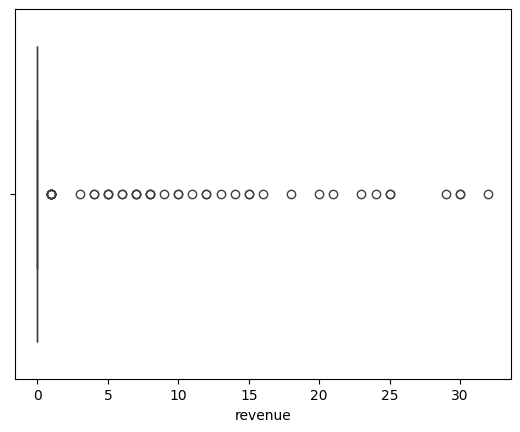

In [35]:
#Realizamos un diagrama boxplot con los nuevos datos filtrados
sns.boxplot(x=movies_r["revenue"])
plt.show()

In [36]:
# Se filtran también los datos que se encuentran por encima del linmite superior para ver su descripción
movies_ra = movies[movies["revenue"]> limite_sup]
movies_ra.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,5679.00,5679.00,5679.00,5679.00,5677.00,5679.00,5679.00,1130.00,5679.00,5679.00
mean,26607166.47,65005.31,9.08,78581029.12,105.80,6.15,637.97,122773.46,2002.58,3774.47
std,39692471.80,96358.50,12.50,159865849.54,18.51,0.95,1193.58,125422.37,10.06,178463.55
min,0.00,5.00,0.00,41.00,0.00,0.00,0.00,10.00,1980.00,0.00
25%,0.00,9596.50,4.94,3106697.00,94.00,5.60,56.00,9818.00,1995.00,0.00
50%,12000000.00,17927.00,7.87,20416563.00,103.00,6.20,207.00,91661.50,2005.00,1.00
75%,35000000.00,70726.50,11.24,78380588.50,115.00,6.80,642.00,173710.00,2011.00,2.89
max,380000000.00,443319.00,547.49,2787965087.00,338.00,10.00,14075.00,479888.00,2017.00,12396383.00


De acuerdo a la información descriptiva de las películas con revenue por encima del limite superior por boxplot, se evidencia que cuentan con mayores budget, return y popularity que las películas filtradas en el paso anterior(revenue por debajo del limite superior por boxplot)

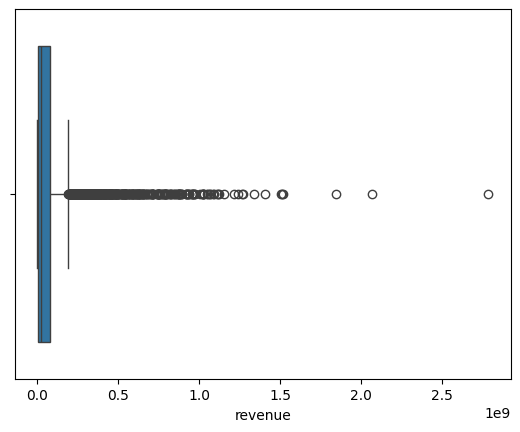

In [37]:
#Realizamos un diagrama boxplot con los nuevos datos filtrados
sns.boxplot(x=movies_ra["revenue"])
plt.show()

In [38]:
#Vamos a analizar el promedio de revenue por genero
b = movies.groupby(["genre_1_name"])["revenue"].mean().reset_index()
b = pd.DataFrame(b)
b = b.rename(columns={"genre_1_name":"genero", "revenue":"revenue_prom"}) #Ajustamos el nombre de la columna a genero
b = b.sort_values(by="revenue_prom", ascending= False)
b

,genero,revenue_prom
1,Adventure,98740359.32
2,Animation,61700006.84
0,Action,45245282.76
8,Fantasy,44958368.85
7,Family,44242502.00
15,Science Fiction,43105980.82
4,Crime,16656815.66
19,Western,16556181.60
10,History,14835062.62
14,Romance,14517259.26


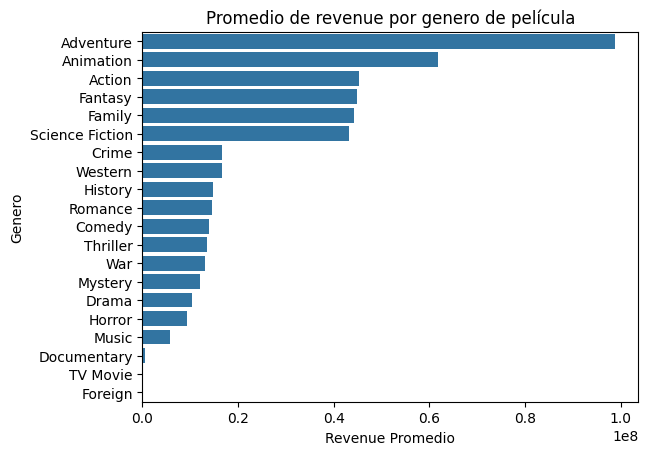

In [39]:
#Se procede a graficar el histograma del promedio de revenue por genero
sns.barplot(x="revenue_prom", y="genero", data=b)  # Grafico de barras votos promedio por genero
plt.title("Promedio de revenue por genero de película")
plt.xlabel("Revenue Promedio")
plt.ylabel("Genero")
plt.show()

Las peliculas de genero Avernture, Animation, Action y Fantasy, tienen los mayores promedio de revenue, siendo el más alto para el genero Adventure. Animation se encuentra de segundo puesto y a su vez es el genero con uno de los mayores puntajes promedio. Por otra parte Documentary es de los generos con mejores revenue promedio, sin embargo, se encontraba en el top de los generos con mayores puntajes.

In [40]:
# Se procede a realizar un análisis de la variable budget
movies["budget"].describe()

count       22776.00
mean      7474562.47
std      23188368.87
min             0.00
25%             0.00
50%             0.00
75%       1000000.00
max     380000000.00
Name: budget, dtype: float64

In [41]:
#Se evidencia similar comportamiento que con la variable revenue
#Se filtraran los datos por datos con solo valores atipicos y datos sin valores atipicos
q1b = np.quantile(movies["budget"], 0.25)
q3b = np.quantile(movies["budget"], 0.75)
irqb = q3b-q1b
limite_supb= q3b + (1.5*irqb)
print(f"El limite superior es {limite_supb}")

El limite superior es 2500000.0


In [42]:
#Filtramos los datos sin atipicos
movies_b = movies[movies["budget"]<= limite_supb]
movies_b.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,17648.00,17648.00,17648.00,17648.00,17600.00,17648.00,17648.00,1439.00,17648.00,17648.00
mean,68242.83,121452.28,2.62,1124343.05,92.76,5.58,37.72,194533.56,2003.86,1213.94
std,321375.47,122710.56,3.19,8028943.04,35.83,1.73,95.18,137924.55,10.23,101245.96
min,0.00,3.00,0.00,0.00,0.00,0.00,0.00,131.00,1980.00,0.00
25%,0.00,27009.75,0.54,0.00,85.00,5.00,4.00,91945.00,1997.00,0.00
50%,0.00,63988.50,1.37,0.00,93.00,5.90,12.00,157626.00,2007.00,0.00
75%,0.00,201443.75,3.57,0.00,102.00,6.60,33.00,297844.00,2012.00,0.00
max,2500000.00,465044.00,67.96,253625427.00,1140.00,10.00,3821.00,480160.00,2017.00,12396383.00


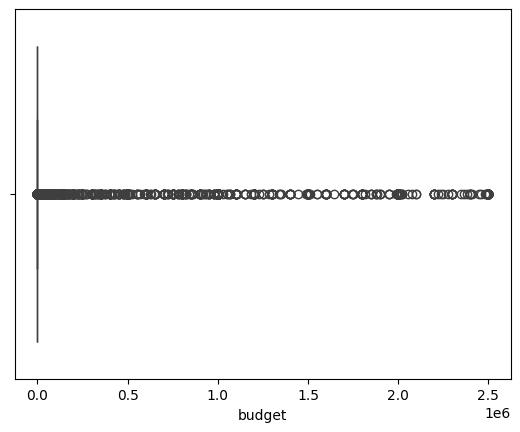

In [43]:
#Realizamos un diagrama boxplot con los nuevos datos filtrados
sns.boxplot(x=movies_b["budget"])
plt.show()

Como se evidencia los datos aún sin atipicos, siguen siendo muy dispersos.

In [44]:
#Se procede a realizar un análisis de solo los valores atipicos en budget
movies_ba = movies[movies["budget"]> limite_supb]
movies_ba.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id_collections,release_year,return
count,5128.00,5128.00,5128.00,5128.00,5127.00,5128.00,5128.00,1087.00,5128.00,5128.00
mean,32963394.19,65701.06,9.47,83155081.66,107.45,6.04,686.61,120428.65,2003.80,2.25
std,39364682.33,99613.84,13.06,167335516.21,23.03,0.97,1242.18,122664.34,9.27,4.13
min,2556455.00,5.00,0.00,0.00,0.00,0.00,0.00,10.00,1980.00,0.00
25%,8500000.00,9478.50,5.23,0.00,94.00,5.50,63.00,9744.00,1998.00,0.00
50%,19550000.00,16098.00,8.07,20231935.00,104.00,6.10,223.00,91427.00,2006.00,1.04
75%,40000000.00,70095.50,11.43,88990712.00,116.00,6.70,713.50,169166.00,2011.00,2.84
max,380000000.00,460846.00,547.49,2787965087.00,540.00,8.50,14075.00,479888.00,2017.00,75.52


Se evidencia que aquí en estos datos, se encuentran peliculas con valores más altos de revenue y de popularidad que los datos sin atipicos en budget.

In [45]:
#Vamos a analizar el promedio de budget por genero
c = movies.groupby(["genre_1_name"])["budget"].mean().reset_index()
c = pd.DataFrame(c)
c = c.rename(columns={"genre_1_name":"genero", "budget":"budget_prom"}) #Ajustamos el nombre de la columna a genero
c = c.sort_values(by="budget_prom", ascending= False)
c

,genero,budget_prom
1,Adventure,33306157.14
0,Action,18226150.39
2,Animation,18050639.34
8,Fantasy,16850664.02
15,Science Fiction,12795423.41
7,Family,11656360.70
19,Western,10768657.46
18,War,8494532.68
4,Crime,8244897.07
10,History,6467965.47


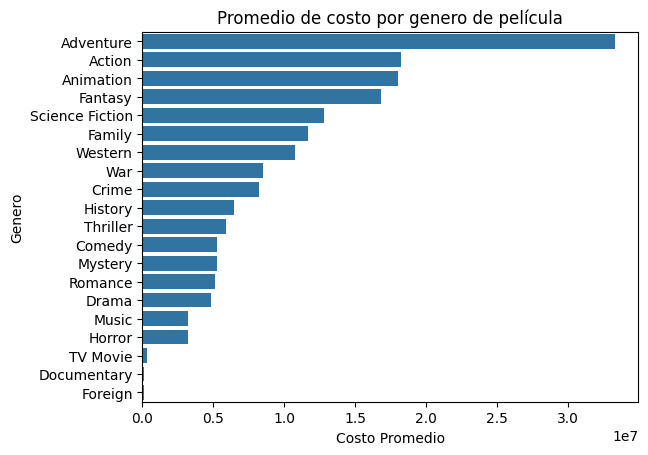

In [46]:
#Se procede a graficar el histograma del promedio de budget por genero
sns.barplot(x="budget_prom", y="genero", data=c)  # Grafico de barras votos promedio por genero
plt.title("Promedio de costo por genero de película")
plt.xlabel("Costo Promedio")
plt.ylabel("Genero")
plt.show()

Las películas de genero Adventure, Action, Animation y Fantasy, tienen los mayores promedios de costos, coincidente con las películas que tienen los mayores revenue promedio, sigue siendo el más alto costo para el genero Adventure, igual que el revenue.

In [47]:
#Vamos a analizar la variable popularidad
movies["popularity"].describe()

count   22776.00
mean        4.16
std         7.38
min         0.00
25%         0.73
50%         2.07
75%         6.23
max       547.49
Name: popularity, dtype: float64

In [48]:
# Vamos a determinar el valor promedio de popularidad por genero de película
d = movies.groupby(["genre_1_name"])["popularity"].mean().reset_index()
d = pd.DataFrame(d)
d = d.rename(columns={"genre_1_name":"genero", "popularity":"popularity_prom"}) #Ajustamos el nombre de la columna a genero
d = d.sort_values(by="popularity_prom", ascending= False)
d

,genero,popularity_prom
1,Adventure,7.77
7,Family,6.80
0,Action,6.22
8,Fantasy,5.93
15,Science Fiction,5.92
2,Animation,5.84
4,Crime,5.13
13,Mystery,4.95
17,Thriller,4.75
11,Horror,4.23


Las películas con mayor popularidad son de tipo adventure, las películas de este genero se encuentran entre los valores más altos de budget, revenue y vote_average. También los generos de películas como Family y Action se encuentran en las películas con mayor popularidad.

In [49]:
movies.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'id_collections',
       'name_collections', 'genre_1_name', 'genre_2_name', 'genre_3_name',
       'companies_1_name', 'companies_2_name', 'companies_3_name',
       'country_1_name', 'country_2_name', 'country_3_name', 'language_1_iso',
       'language_1_name', 'language_2_iso', 'language_2_name',
       'language_3_iso', 'language_3_name', 'release_year', 'return'],
      dtype='object')

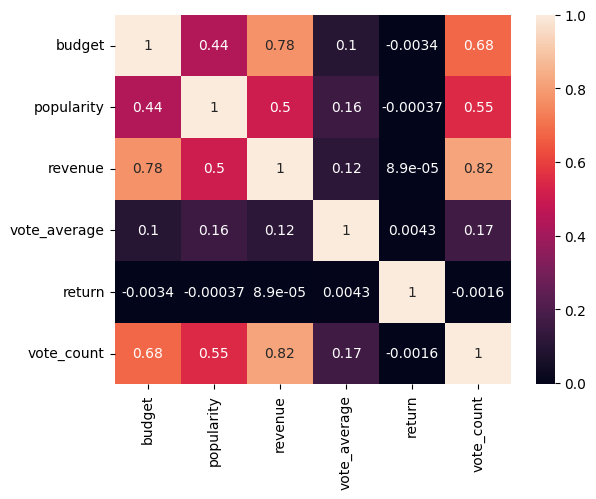

In [50]:
#Se procede a realizar una matriz de correlación con las variables númericas
sns.heatmap(movies[['budget','popularity','revenue', "vote_average", "return", "vote_count"]].corr(), annot=True)
plt.show()

De acuerdo con la matriz de correlación las variables revenue- budget ,  revenue - popularity  y budget - popularity tienen una relación lineal. 

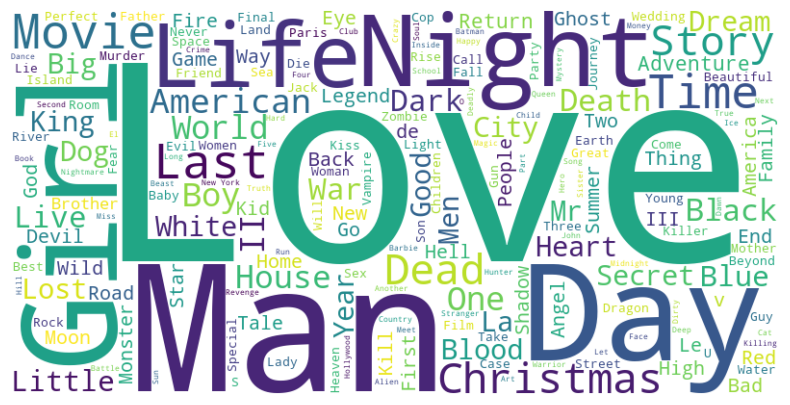

In [51]:
#Vamos a analizar la variable tittle
#Vamos a usar nube de palabras
from wordcloud import WordCloud
# Extraer todos los títulos y convertirlos en una sola cadena de texto
all_titles = ' '.join(movies['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Se puede observar que las palabras más repetidas en los titulos son:LOVE,MAN, DAY, LifeNight (palabras en inglés,consecuente con el fltro de idioma aplicado) 

In [52]:
#Vamos a analisar la variable genero con un histograma
e = movies.groupby(["genre_1_name"])["genre_1_name"].value_counts().reset_index()
e = pd.DataFrame(e)
e = e.rename(columns={"genre_1_name":"genero"}) #Ajustamos el nombre de la columna a genero
e =e.sort_values(by="count", ascending= True)
e

,genero,count
9,Foreign,24
19,Western,67
10,History,112
18,War,117
12,Music,221
13,Mystery,262
7,Family,292
16,TV Movie,307
15,Science Fiction,363
8,Fantasy,389


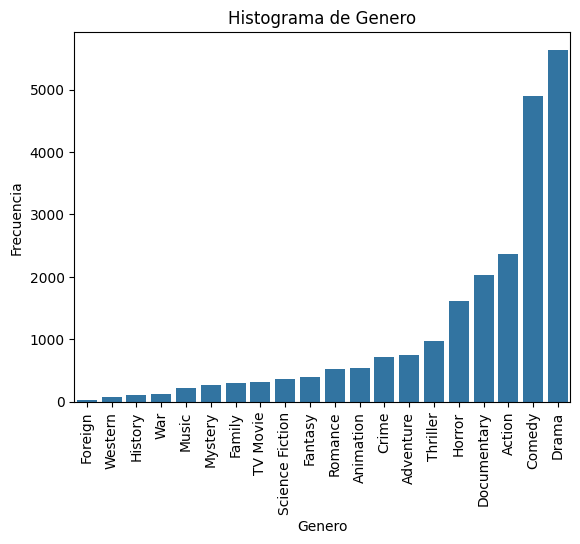

In [53]:
#Se realiza un histograma de frecuencias de genero
sns.barplot(x="genero", y="count", data=e, )  # Grafico de barras votos promedio por genero
plt.title("Histograma de Genero")
plt.xlabel("Genero")
plt.xticks(rotation=90)
plt.ylabel("Frecuencia")
plt.show()

De acuerdo con este EDA se pueden ver los siguientes datos importantes a cerca de las películas:
1. Los valores budget y revenue se encuentran bastante dispersos, estás variables tienen una relación lineal, las peliculas con valores más altos de budget tienen valores altos de revenue
2. El genero con más puntaje promedio es Animation
3. El genero Documentary se encuentra entre los generos con mejores puntajes promedios, pero no tienen valores altos ni de budget ni revenue
4. El genero con mayor numero de películas es Drama
5. Las palabras más populares en los titulos de las peliculas son:LOVE,MAN, DAY, LifeNight